In [70]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [71]:
train = pd.read_csv('data/mnist_train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = train.label.values
x = train.loc[:,train.columns != "label"].values/255
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)


In [82]:
batch_size = 100
n_iters = 10001
num_epochs = int(n_iters / (len(x_train) / batch_size))
num_epochs

29

In [83]:
train=TensorDataset(x_train_tensor,y_train_tensor)
test=TensorDataset(x_test_tensor,y_test_tensor)

train_loader=DataLoader(dataset=train,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(dataset=test,batch_size=batch_size,shuffle=False)

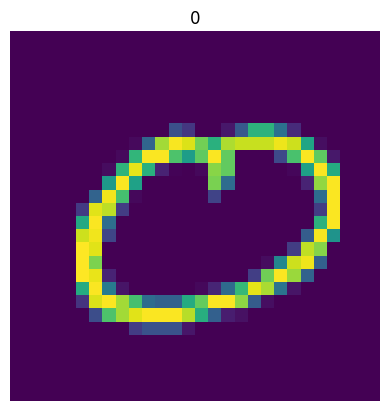

In [77]:
# deneme görüntüsü
plt.imshow(x[757].reshape(28,28))
plt.axis('off')
plt.title(y[757])
plt.show()

## Logistic Regresyon

In [91]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for param in model.parameters():
    print(param)



count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs+1):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28)).float()
        labels = Variable(labels).long()
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if count % 50 == 0:      
            correct = 0
            total = 0
            for images, labels in test_loader: 

                test = Variable(images.view(-1, 28*28)).float()
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0094, -0.0292, -0.0328,  ..., -0.0353, -0.0085,  0.0270],
        [-0.0232,  0.0247, -0.0260,  ...,  0.0015, -0.0231,  0.0180],
        [-0.0235, -0.0217, -0.0197,  ...,  0.0316, -0.0162,  0.0071],
        ...,
        [-0.0202, -0.0266, -0.0211,  ...,  0.0094,  0.0120,  0.0252],
        [ 0.0055,  0.0327, -0.0251,  ...,  0.0179,  0.0145, -0.0006],
        [-0.0334, -0.0063,  0.0173,  ...,  0.0108, -0.0318,  0.0074]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0163, -0.0289,  0.0238, -0.0320,  0.0112, -0.0352, -0.0158, -0.0073,
        -0.0314, -0.0059], requires_grad=True)
Parameter containing:
tensor([[-0.0094, -0.0292, -0.0328,  ..., -0.0353, -0.0085,  0.0270],
        [-0.0232,  0.0247, -0.0260,  ...,  0.0015, -0.0231,  0.0180],
        [-0.0235, -0.0217, -0.0197,  ...,  0.0316, -0.0162,  0.0071],
        ...,
        [-0.0202, -0.0266, -0.0211,  ...,  0.0094,  0.0120,  0.0252],
        [ 0.0055,  0.0327, -0.0251,  ...,  0.0179,  0

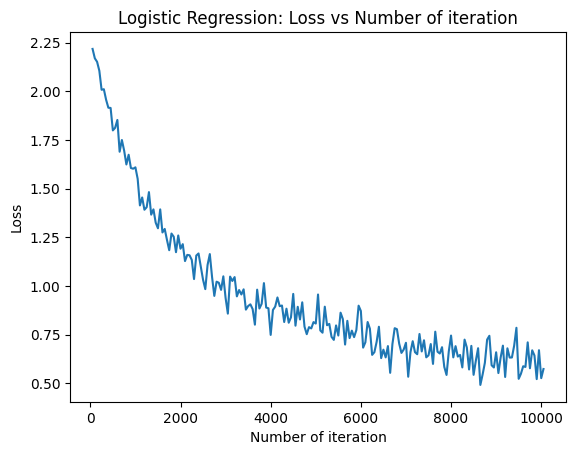

In [92]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()